Basic imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [6]:
customers = pd.read_csv("/Users/sana/Downloads/Mall_customers.csv")

Investigating data

In [7]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
customers.shape

(200, 5)

In [12]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Data exploration

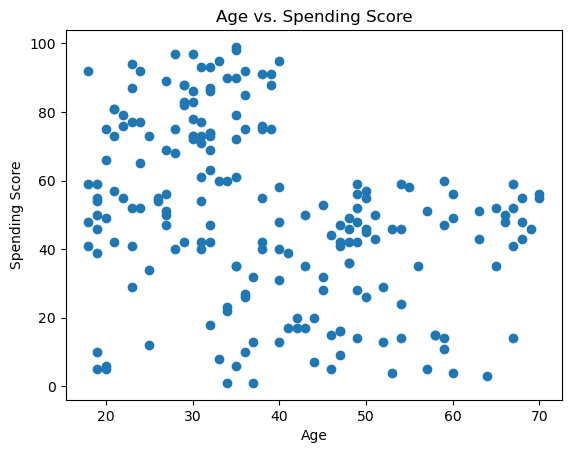

In [30]:
plt.scatter(x = customers["Age"], y = customers["Spending Score (1-100)"])
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Age vs. Spending Score")
plt.show()

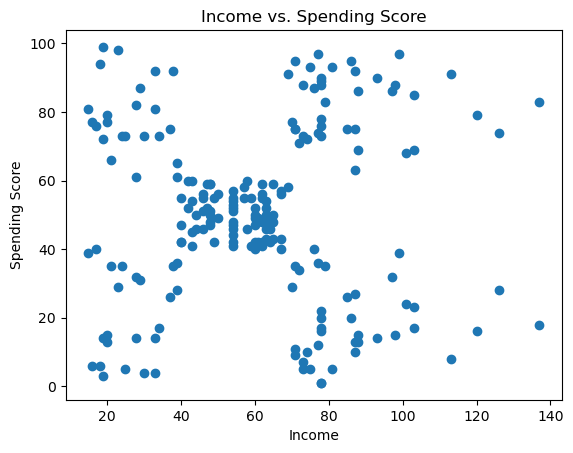

In [27]:
plt.scatter(x = customers["Annual Income (k$)"], y = customers["Spending Score (1-100)"])
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.title("Income vs. Spending Score")
plt.show()

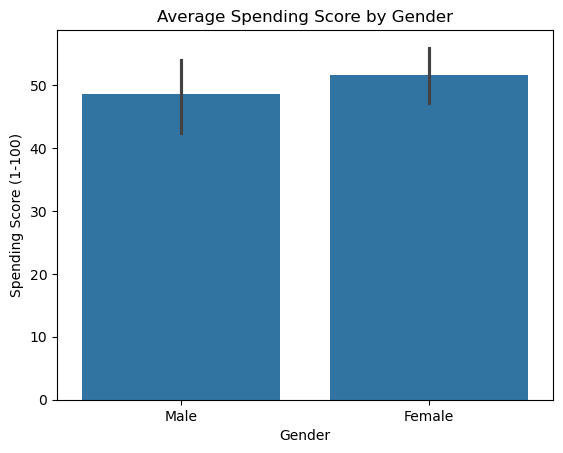

In [36]:
sns.barplot(x='Gender', y='Spending Score (1-100)', data=customers, estimator=np.mean) 
plt.title('Average Spending Score by Gender')
plt.show()

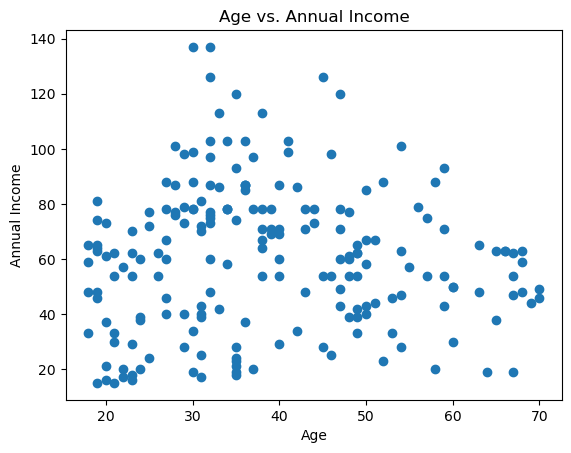

In [53]:
plt.scatter(x = customers["Age"], y = customers["Annual Income (k$)"])
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.title("Age vs. Annual Income")
plt.show()

WCSS Values

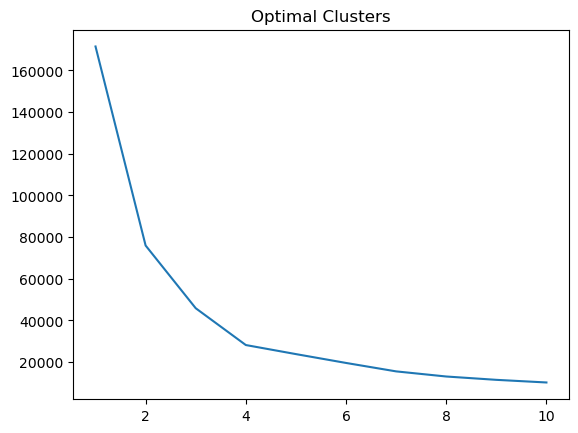

In [45]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(customers[['Age', 'Spending Score (1-100)']])  
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Optimal Clusters')
plt.show()

In [40]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(customers[['Age', 'Spending Score (1-100)']])

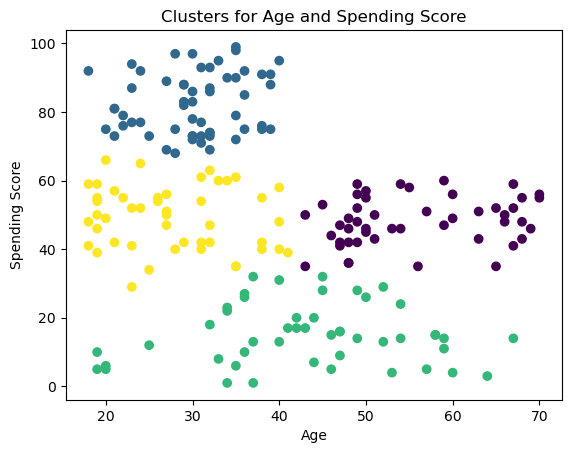

In [44]:
plt.scatter(customers['Age'], customers['Spending Score (1-100)'], 
            c=clusters, cmap='viridis')
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Clusters for Age and Spending Score")
plt.show()

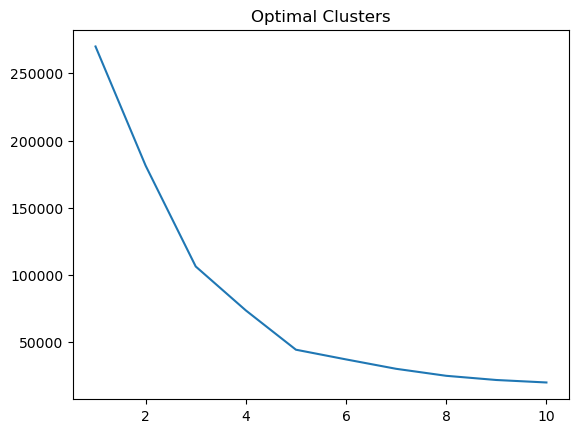

In [47]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(customers[['Annual Income (k$)', 'Spending Score (1-100)']])  
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Optimal Clusters')
plt.show()

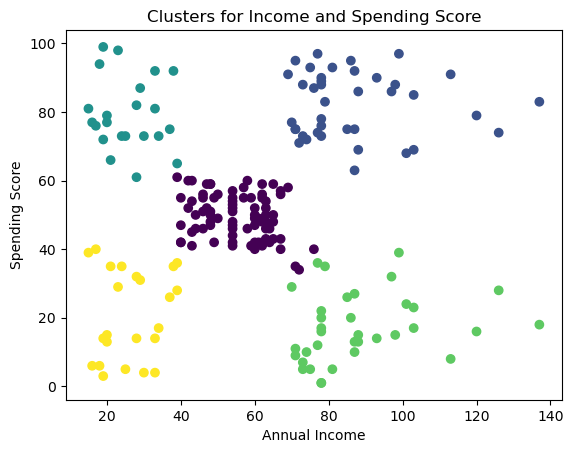

In [54]:
kmeans2 = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters2 = kmeans2.fit_predict(customers[['Annual Income (k$)', 'Spending Score (1-100)']])
plt.scatter(customers['Annual Income (k$)'], customers['Spending Score (1-100)'], 
            c=clusters2, cmap='viridis')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Clusters for Income and Spending Score")
plt.show()